In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

# Load data and get familiar with it

## Data properties

In [2]:
train = pd.read_csv('train.csv')
print(train.shape)
print(train.dtypes)

(1460, 81)
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt   

## Sample data

In [3]:
# print sample data
train.tail(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1450,1451,90,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000
1451,1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,New,Partial,287090
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [4]:
# get data description
train.describe()

/Users/ankitmodi/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,NaN,7553.500000,5.000000,5.000000,1954.000000,1967.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,NaN,9478.500000,6.000000,5.000000,1973.000000,1994.000000,NaN,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,NaN,11601.500000,7.000000,6.000000,2000.000000,2004.000000,NaN,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# sort by some feature: say LotArea
temp_train = train.sort_values('LotArea', ascending=False)
temp_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000
451,452,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,280000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1396,1397,20,RL,NaN,57200,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,160000
769,770,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,538000
457,458,20,RL,NaN,53227,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,256000
384,385,60,RL,NaN,53107,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,240000


## Plotting

In [6]:
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

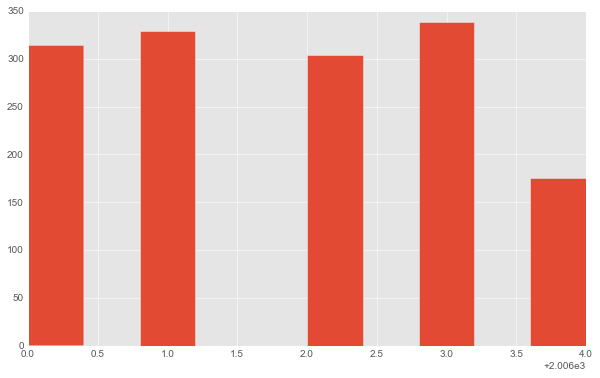

In [7]:
# plot histogram of YrSold
plt.hist(train['YrSold'])
plt.show()

# Target

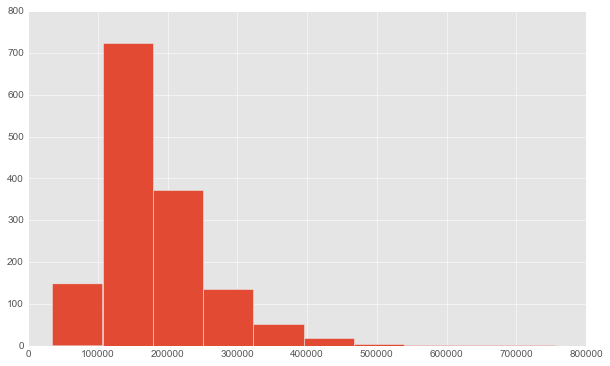

In [8]:
# plot histogram of target i.e. SalePrice
plt.hist(train['SalePrice'])
plt.show()

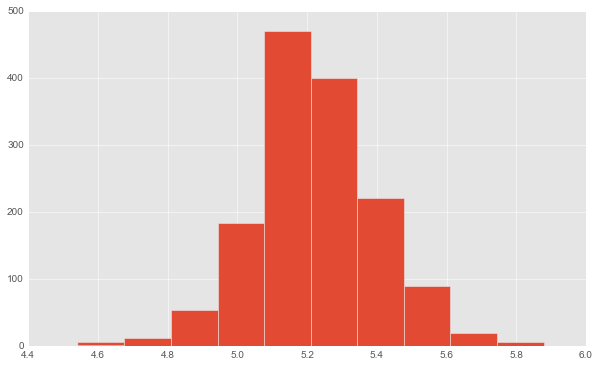

In [9]:
# Does it look like a standard bell curve?
# how can we standardize it?
target = np.log10(train['SalePrice'])
plt.hist(target)
plt.show()

# Features

## Handling categorical data

In [10]:
# check type of LandContour
print(train.LandContour.dtype)

object


In [11]:
# convert it to category type
train['CategoricalLandContour'] = train['LandContour'].astype("category")
print(train.CategoricalLandContour.dtype)

category


In [12]:
# select all categorical variables and print their description

categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,CategoricalLandContour
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1460,7,281,54,1460,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,3,5,5,3,3,4,4,9,6,4
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal,Lvl
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,605,1311,1326,1340,3,157,49,1267,1198,1311


## Correlation between features

In [13]:
# Get correlation between numerical features

In [14]:
correlation_values = train.select_dtypes(include=[np.number]).corr()
correlation_values

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [15]:
# plot them using sns

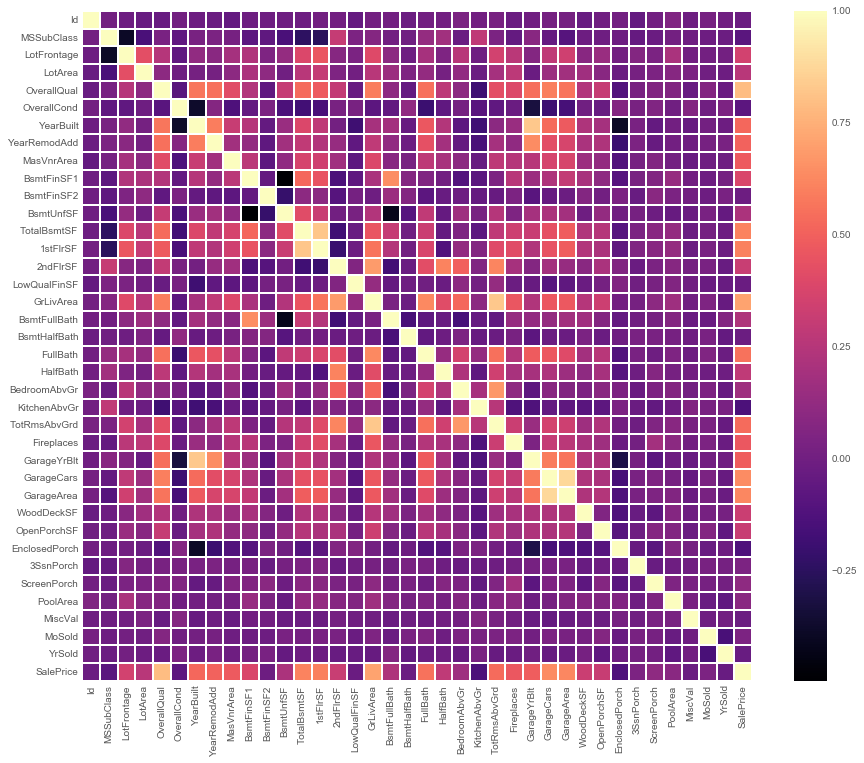

In [16]:
f, ax = plt.subplots(figsize=(15, 12))
_ = sns.heatmap(correlation_values, linecolor = 'white', cmap = 'magma', linewidths = 1)

## Relationship between features

/Users/ankitmodi/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


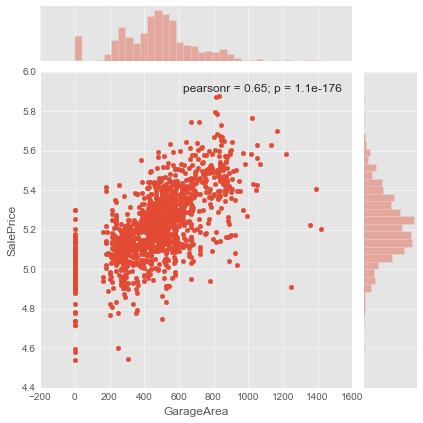

In [17]:
# f, ax = plt.subplots(figsize=(15, 12))

sns.jointplot(train['GarageArea'], target)

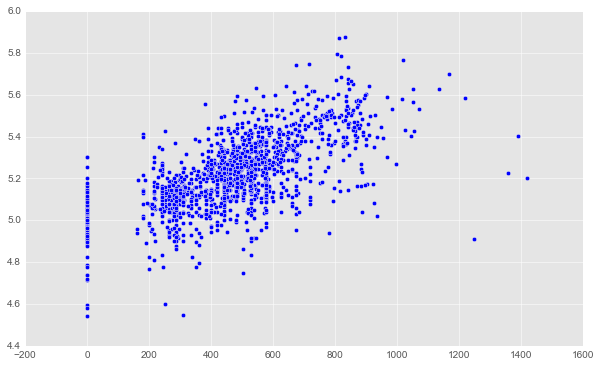

In [18]:
# plot a scatter plot between garage area and target
plt.scatter(train['GarageArea'], target)
plt.show()

### Removing outliers

/Users/ankitmodi/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


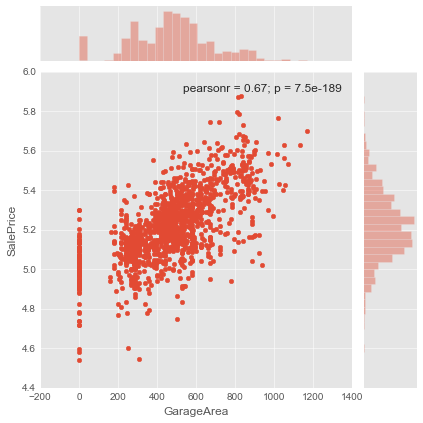

In [19]:
# remove values with GarageArea > 1200 and plot the same scatter again
train = train[train.GarageArea < 1200]
sns.jointplot(train['GarageArea'], np.log10(train['SalePrice']))


## Null values

In [20]:
# count the null values

nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False))
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls = nulls[nulls['Null Count']>0]

nulls

,Null Count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageQual,81
GarageCond,81
GarageFinish,81


## Missing data

In [21]:
train.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,CategoricalLandContour
0,False,False,False,False,False,False,True,False,False,False,...,True,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,True,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,True,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,True,True,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,True,True,True,False,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,True,False,False,False,...,True,True,True,False,False,False,False,False,False,False
7,False,False,False,True,False,False,True,False,False,False,...,True,True,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,True,False,False,False,...,True,True,True,False,False,False,False,False,False,False
9,False,False,False,False,False,False,True,False,False,False,...,True,True,True,False,False,False,False,False,False,False


In [22]:
train.isnull().sum()

Id                           0
MSSubClass                   0
MSZoning                     0
LotFrontage                258
LotArea                      0
Street                       0
Alley                     1364
LotShape                     0
LandContour                  0
Utilities                    0
LotConfig                    0
LandSlope                    0
Neighborhood                 0
Condition1                   0
Condition2                   0
BldgType                     0
HouseStyle                   0
OverallQual                  0
OverallCond                  0
YearBuilt                    0
YearRemodAdd                 0
RoofStyle                    0
RoofMatl                     0
Exterior1st                  0
Exterior2nd                  0
MasVnrType                   8
MasVnrArea                   8
ExterQual                    0
ExterCond                    0
Foundation                   0
                          ... 
KitchenAbvGr                 0
KitchenQ

In [23]:
train.isnull().sum() != 0

Id                        False
MSSubClass                False
MSZoning                  False
LotFrontage                True
LotArea                   False
Street                    False
Alley                      True
LotShape                  False
LandContour               False
Utilities                 False
LotConfig                 False
LandSlope                 False
Neighborhood              False
Condition1                False
Condition2                False
BldgType                  False
HouseStyle                False
OverallQual               False
OverallCond               False
YearBuilt                 False
YearRemodAdd              False
RoofStyle                 False
RoofMatl                  False
Exterior1st               False
Exterior2nd               False
MasVnrType                 True
MasVnrArea                 True
ExterQual                 False
ExterCond                 False
Foundation                False
                          ...  
KitchenA

In [24]:
# how many features have non null values?
sum(train.isnull().sum() != 0)

19

In [25]:
only_nums = train.select_dtypes(include=[np.number])
# print(only_nums.isnull().sum().sort_values(ascending=False))
# sum(only_nums.isnull().sum() != 0)
only_nums.shape

(1455, 38)

In [26]:
drop_nulls = only_nums.dropna()
# print(drop_nulls.isnull().sum().sort_values(ascending=False))
drop_nulls.shape

(1117, 38)

In [27]:
inter_nulls = only_nums.interpolate()
inter_nulls.shape

(1455, 38)

In [28]:
not_null_train = inter_nulls
sum(not_null_train.isnull().sum() != 0)

0

# Training and Evaluation (Base model)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [30]:
def train_and_evaluate(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=0.30)
    lr =LinearRegression()
    my_model = lr.fit(X_train, y_train)
    
    train_predictions = my_model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    print('train error: ', train_rmse)
    
    predictions = my_model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, predictions))
    print('test_error : ', test_rmse)
    
    print('Accuracies: Train: {}'.format(my_model.score(X_train, y_train)))
    print('Accuracies: Test : {}'.format(my_model.score(X_test, y_test)))
    
    
    sns.regplot(y = train_predictions, x = y_train, color = 'red', label = 'Training Data', scatter_kws={'alpha':0.75})
    sns.regplot(y = predictions, x = y_test, color = 'green', label = 'Validation Data', scatter_kws={'alpha':0.75})
    plt.title('Predicted Values vs Test Values')
    plt.xlabel('Real Values')
    plt.ylabel('Predicted Values')
    plt.legend(loc = 'upper left')
    

/Users/ankitmodi/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


train error:  0.05785681696152795
test_error :  0.0574139317830863
Accuracies: Train: 0.8894401464735501
Accuracies: Test : 0.8869656651210697


/Users/ankitmodi/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


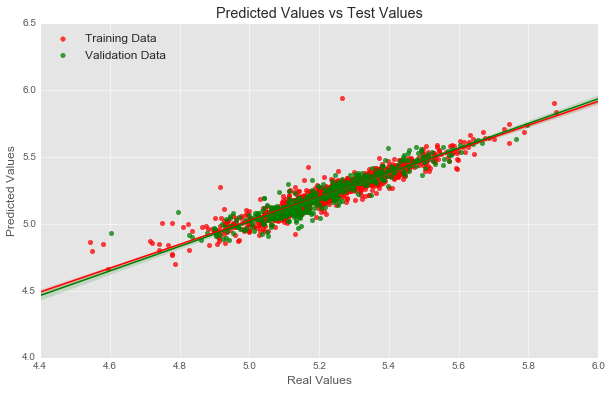

In [31]:
# train using target and features
y1 = np.log10(train.SalePrice)
X1 = not_null_train.drop(['SalePrice', 'Id'], axis=1)
train_and_evaluate(X1, y1)

In [32]:
# Add accuracies to the above function

#  How to improve results further?

## Fill missing data

In [33]:
# categorical
print(train['PoolQC'])
print(train['PoolQC'].value_counts())
train['PoolQC'].fillna('No Pool', inplace = True)
print(train['PoolQC'])
print(train['PoolQC'].value_counts())


0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19      NaN
20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
25      NaN
26      NaN
27      NaN
28      NaN
29      NaN
       ... 
1430    NaN
1431    NaN
1432    NaN
1433    NaN
1434    NaN
1435    NaN
1436    NaN
1437    NaN
1438    NaN
1439    NaN
1440    NaN
1441    NaN
1442    NaN
1443    NaN
1444    NaN
1445    NaN
1446    NaN
1447    NaN
1448    NaN
1449    NaN
1450    NaN
1451    NaN
1452    NaN
1453    NaN
1454    NaN
1455    NaN
1456    NaN
1457    NaN
1458    NaN
1459    NaN
Name: PoolQC, dtype: object
Gd    2
Ex    2
Fa    2
Name: PoolQC, dtype: int64
0       No Pool
1       No Pool
2       No Pool
3       No Pool
4       No Pool
5       No Pool
6       No Pool
7       No Pool
8       No Pool
9       No Pool
10      No Pool
11      No Po

In [34]:
train['MiscFeature'].fillna('None', inplace = True)
train['MiscFeature'].value_counts()

None    1402
Shed      48
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64

In [35]:
# a1 = None
# a2 = ''
# a3 = 'ankit'

# print(a1 is None)
# print(a2 is None)
# print(a3 is None)
# a1 + 'bggh'

In [36]:
train['Alley'].fillna('No alley access', inplace = True)
train['Fence'].fillna('No Fence', inplace = True)
train['FireplaceQu'].fillna('No Fireplace', inplace = True)
train['GarageType'].fillna('No Garage', inplace = True)
train['GarageCond'].fillna('No Garage', inplace = True)
train['GarageFinish'].fillna('No Garage', inplace = True)
train['GarageQual'].fillna('No Garage', inplace = True)
train['BsmtFinType2'].fillna('No Basement', inplace = True)
train['BsmtExposure'].fillna('No Basement', inplace = True)
train['BsmtQual'].fillna('No Basement', inplace = True)
train['BsmtCond'].fillna('No Basement', inplace = True)
train['BsmtFinType1'].fillna('No Basement', inplace = True)
train['MasVnrType'].fillna('None', inplace = True)
train['GarageYrBlt'].fillna('No Garage', inplace = True)



In [37]:
# Fill with Mode
print(train['Electrical'].value_counts())
train['Electrical'].fillna(value = 'SBrkr', inplace = True)
train['Electrical'].value_counts()

SBrkr    1329
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


SBrkr    1330
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [38]:
# Fill with 0
train['MasVnrArea'].fillna(0, inplace = True)
train['LotFrontage'].fillna(0, inplace = True)


In [39]:
cat_vars = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'YrSold', 'MoSold', 
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'YearBuilt', 'YearRemodAdd']
# convert all cat_vars to categorical data type

## Dummy variables for categorical data

In [40]:
# Creating Dummy Variables
cat = pd.get_dummies(train[cat_vars], drop_first = True)

train_dummy = train
train_dummy = pd.concat([train_dummy, cat], axis = 1)
train_dummy.drop(cat_vars, axis = 1, inplace = True)
train_dummy.dtypes

Id                         int64
LotFrontage              float64
LotArea                    int64
MasVnrArea               float64
BsmtFinSF1                 int64
BsmtFinSF2                 int64
BsmtUnfSF                  int64
TotalBsmtSF                int64
1stFlrSF                   int64
2ndFlrSF                   int64
LowQualFinSF               int64
GrLivArea                  int64
BsmtFullBath               int64
BsmtHalfBath               int64
FullBath                   int64
HalfBath                   int64
BedroomAbvGr               int64
KitchenAbvGr               int64
TotRmsAbvGrd               int64
Fireplaces                 int64
GarageCars                 int64
GarageArea                 int64
WoodDeckSF                 int64
OpenPorchSF                int64
EnclosedPorch              int64
3SsnPorch                  int64
ScreenPorch                int64
PoolArea                   int64
MiscVal                    int64
SalePrice                  int64
          

## Evaluation

In [41]:
tmp = train_dummy.select_dtypes(exclude=[np.number])
tmp.dtypes

CategoricalLandContour    category
dtype: object

In [49]:
print(len(train.columns))
train_dummy = train_dummy.drop('CategoricalLandContour', axis=1)
all_cols = train_dummy.columns
print([i for i in all_cols if 'LandCo' in i])
len(all_cols)

82
['LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl']


349

In [50]:
train_dummy

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,196.0,706,0,150,856,856,854,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,3,68.0,11250,162.0,486,0,434,920,920,866,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,4,60.0,9550,0.0,216,0,540,756,961,756,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,6,85.0,14115,0.0,732,0,64,796,796,566,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6,7,75.0,10084,186.0,1369,0,317,1686,1694,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7,8,0.0,10382,240.0,859,32,216,1107,1107,983,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8,9,51.0,6120,0.0,0,0,952,952,1022,752,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,10,50.0,7420,0.0,851,0,140,991,1077,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


train error:  0.038870507309924
test_error :  0.0680408093763521
Accuracies: Train: 0.9500967536825555
Accuracies: Test : 0.8412496295332207


/Users/ankitmodi/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


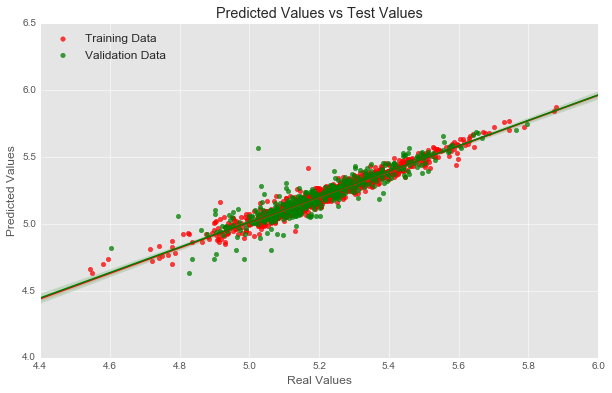

In [51]:
# train it again with train_dummy
y2 = np.log10(train_dummy.SalePrice)
X2 = train_dummy.drop(['SalePrice', 'Id'], axis=1)
train_and_evaluate(X2, y2)

## Check for correlated variables

(37, 37)


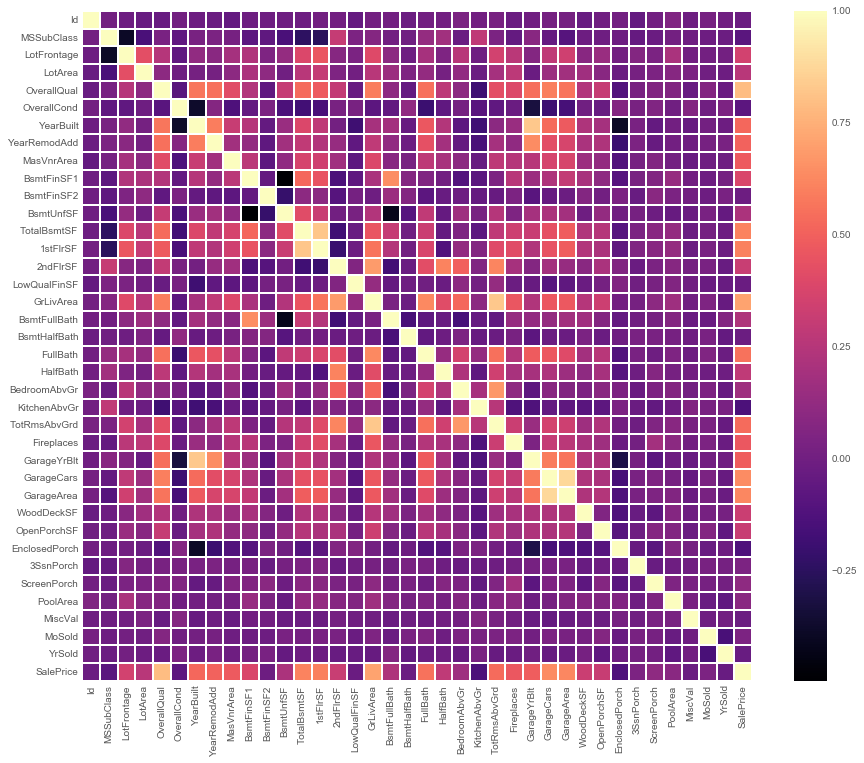

In [52]:
correlations = train.corr()
print(correlations.shape)
f, ax = plt.subplots(figsize=(15, 12))
_ = sns.heatmap(correlation_values, linecolor = 'white', cmap = 'magma', linewidths = 1)


In [53]:
correlations

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.009048,-0.026916,-0.040779,-0.029027,0.014915,-0.012871,-0.021739,-0.055534,-0.017777,...,-0.032639,-0.003017,0.003661,-0.046449,0.001909,0.048604,-0.006677,0.023830,0.001163,-0.021149
MSSubClass,0.009048,1.000000,-0.215009,-0.146399,0.037768,-0.057800,0.029613,0.042461,0.026001,-0.077381,...,-0.019034,-0.004610,-0.011880,-0.043937,-0.025983,0.008153,-0.007173,-0.010328,-0.019501,-0.082984
LotFrontage,-0.026916,-0.215009,1.000000,0.077238,0.164146,-0.050921,0.030241,0.074206,0.084090,0.021396,...,-0.018260,0.051496,0.030599,0.024878,0.025452,0.058340,-0.061784,0.027022,-0.014873,0.214151
LotArea,-0.040779,-0.146399,0.077238,1.000000,0.099892,-0.000641,0.010505,0.010914,0.089855,0.180780,...,0.166865,0.073606,-0.016327,0.021391,0.045364,0.036480,0.038491,0.010042,-0.014268,0.268806
OverallQual,-0.029027,0.037768,0.164146,0.099892,1.000000,-0.094055,0.570420,0.548197,0.398327,0.226728,...,0.240960,0.303898,-0.114145,0.030899,0.066071,0.044797,-0.029746,0.074748,-0.029417,0.792879
OverallCond,0.014915,-0.057800,-0.050921,-0.000641,-0.094055,1.000000,-0.377583,0.073146,-0.124403,-0.043217,...,-0.001057,-0.032339,0.069404,0.025195,0.054093,0.002178,0.069752,-0.004642,0.043995,-0.078465
YearBuilt,-0.012871,0.029613,0.030241,0.010505,0.570420,-0.377583,1.000000,0.591144,0.307860,0.251201,...,0.225366,0.185897,-0.387628,0.031585,-0.050087,-0.005190,-0.033411,0.013903,-0.014655,0.521888
YearRemodAdd,-0.021739,0.042461,0.074206,0.010914,0.548197,0.073146,0.591144,1.000000,0.171365,0.124300,...,0.206260,0.223921,-0.194118,0.045495,-0.038606,-0.003475,-0.008930,0.023017,0.034873,0.505876
MasVnrArea,-0.055534,0.026001,0.084090,0.089855,0.398327,-0.124403,0.307860,0.171365,1.000000,0.238615,...,0.157531,0.114146,-0.109011,0.020052,0.064561,-0.020329,-0.028887,-0.001258,-0.009695,0.471845
BsmtFinSF1,-0.017777,-0.077381,0.021396,0.180780,0.226728,-0.043217,0.251201,0.124300,0.238615,1.000000,...,0.202236,0.088601,-0.104127,0.028981,0.067936,0.052807,0.005410,0.002142,0.015126,0.405131


In [54]:
# # print pairs of hoghest correlations
cut_off = 0.5
high_corrs = correlations[correlations.abs() > cut_off][correlations.abs() != 1].unstack().dropna().to_dict()
high_corrs = pd.Series(high_corrs, index = high_corrs.keys())
high_corrs = high_corrs.reset_index()
high_corrs = pd.DataFrame(high_corrs)
high_corrs.columns = ['Attributes', 'Correlations']
high_corrs = high_corrs.dropna().sort_values(by = 'Correlations', ascending = False)
# print(type(high_corrs))
print(high_corrs)

                      Attributes  Correlations
7       (GarageCars, GarageArea)      0.890163
32      (GarageArea, GarageCars)      0.890163
62     (TotRmsAbvGrd, GrLivArea)      0.828408
43     (GrLivArea, TotRmsAbvGrd)      0.828408
33       (1stFlrSF, TotalBsmtSF)      0.805875
17       (TotalBsmtSF, 1stFlrSF)      0.805875
44      (OverallQual, SalePrice)      0.792879
65      (SalePrice, OverallQual)      0.792879
49        (SalePrice, GrLivArea)      0.725145
58        (GrLivArea, SalePrice)      0.725145
26         (GrLivArea, 2ndFlrSF)      0.697510
55         (2ndFlrSF, GrLivArea)      0.697510
5   (BedroomAbvGr, TotRmsAbvGrd)      0.679553
3   (TotRmsAbvGrd, BedroomAbvGr)      0.679553
39    (BsmtFinSF1, BsmtFullBath)      0.656604
29    (BsmtFullBath, BsmtFinSF1)      0.656604
27      (TotalBsmtSF, SalePrice)      0.644318
18      (SalePrice, TotalBsmtSF)      0.644318
40       (SalePrice, GarageCars)      0.644097
38       (GarageCars, SalePrice)      0.644097
52         (G

In [55]:
# # Get the numerical features
mvp_list = ['GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 
            'TotRmsAbvGrd']
num_vars = ['GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 
            'TotRmsAbvGrd', 'SalePrice']

## Variables correlated with target

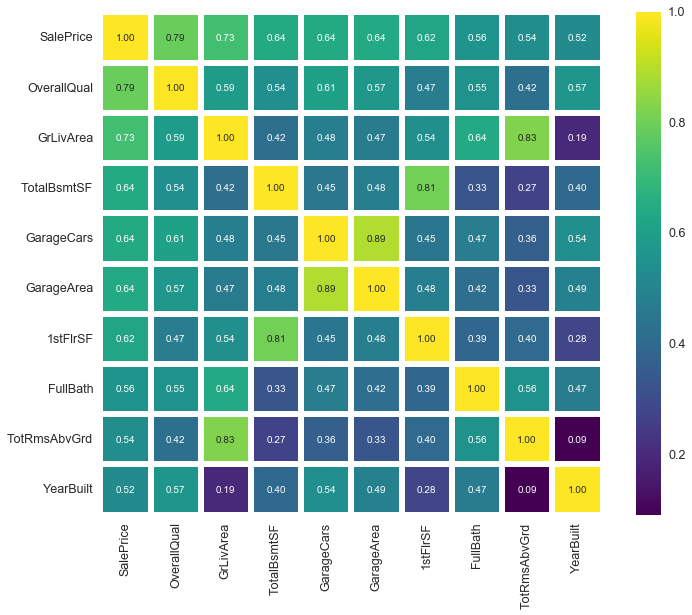

In [56]:
k = 10
cols = correlations.nlargest(k, 'SalePrice')['SalePrice'].index
cols
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, linewidth = 5,
                 yticklabels=cols.values, xticklabels=cols.values, cmap = 'viridis', linecolor = 'white')
plt.show()

## Dummying categorical data

In [57]:
# # Selected categorical variables
cat_mvp_vars = ['MSSubClass', 'MSZoning', 'Utilities', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 
                'OverallQual', 'OverallCond', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'HeatingQC', 'CentralAir',
                'KitchenQual', 'GarageFinish', 'GarageQual', 'PoolQC', 'SaleType', 'YearRemodAdd']

In [58]:
# # visualize how dummies work
# d = train.iloc[:, 10:11]
# print(d.dtypes)
# d.LotConfig.unique

In [59]:
# dummies = pd.get_dummies(d)
# print(dummies.dtypes)
# print(dummies)

## Feature selection

In [60]:
# # select the best features
best_features = mvp_list + cat_mvp_vars

categorical = pd.get_dummies(train[cat_mvp_vars], drop_first = True)

dummy_best_feature_train = train[num_vars]
dummy_best_feature_train = pd.concat([dummy_best_feature_train, categorical], axis = 1)
dummy_best_feature_train.dtypes

GrLivArea                   int64
GarageCars                  int64
GarageArea                  int64
TotalBsmtSF                 int64
1stFlrSF                    int64
FullBath                    int64
TotRmsAbvGrd                int64
SalePrice                   int64
MSSubClass                  int64
OverallQual                 int64
OverallCond                 int64
YearRemodAdd                int64
MSZoning_FV               float64
MSZoning_RH               float64
MSZoning_RL               float64
MSZoning_RM               float64
Utilities_NoSeWa          float64
Neighborhood_Blueste      float64
Neighborhood_BrDale       float64
Neighborhood_BrkSide      float64
Neighborhood_ClearCr      float64
Neighborhood_CollgCr      float64
Neighborhood_Crawfor      float64
Neighborhood_Edwards      float64
Neighborhood_Gilbert      float64
Neighborhood_IDOTRR       float64
Neighborhood_MeadowV      float64
Neighborhood_Mitchel      float64
Neighborhood_NAmes        float64
Neighborhood_N

In [61]:
len(dummy_best_feature_train.columns)

105

train error:  0.04974088209192695
test_error :  0.05473181525536501
Accuracies: Train: 0.9182824483566359
Accuracies: Test : 0.8972798819219151


/Users/ankitmodi/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


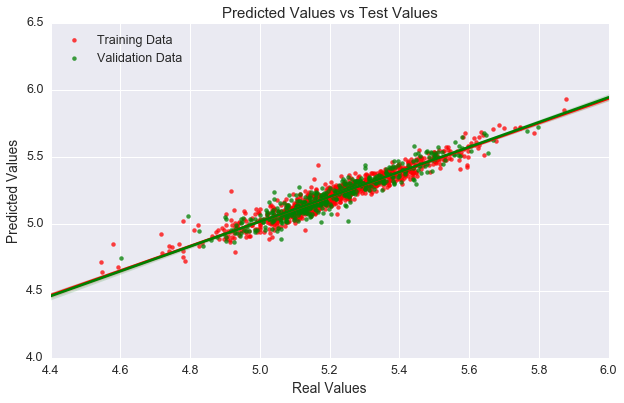

In [62]:
# Train the model again and compare accuracies
y = np.log10(train.SalePrice)
X = dummy_best_feature_train.drop(['SalePrice'], axis=1)
train_and_evaluate(X, y)

## Can we improve it further

In [63]:
y.head()

0    5.319106
1    5.258877
2    5.349278
3    5.146128
4    5.397940
Name: SalePrice, dtype: float64

In [64]:
X.head()

,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,MSSubClass,OverallQual,OverallCond,...,PoolQC_Gd,PoolQC_No Pool,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,1710,2,548,856,856,2,8,60,7,5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1262,2,460,1262,1262,2,6,20,6,8,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1786,2,608,920,920,2,6,60,7,5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1717,3,642,756,961,1,7,70,7,5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2198,3,836,1145,1145,2,9,60,8,5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [65]:
# Things to try:

# Use RFE to select features

In [66]:
len(train_dummy.columns)

349

In [67]:
train_dummy.shape

rfe_x = train_dummy
print(rfe_x.shape)

(1455, 349)


In [68]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
model = LinearRegression()
rfe = RFE(model, 300)
rfe = rfe.fit(rfe_x, y)

In [69]:
transformed_rfe_x = rfe.transform(rfe_x)
print(transformed_rfe_x.shape)

(1455, 300)


In [73]:
rfe_feats = sorted(list(rfe_x.columns[rfe.support_]))
rfe_feats

['1stFlrSF',
 '2ndFlrSF',
 'Alley_Pave',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'BsmtCond_Gd',
 'BsmtCond_No Basement',
 'BsmtCond_Po',
 'BsmtCond_TA',
 'BsmtExposure_Gd',
 'BsmtExposure_No',
 'BsmtExposure_No Basement',
 'BsmtFinType1_BLQ',
 'BsmtFinType1_GLQ',
 'BsmtFinType1_LwQ',
 'BsmtFinType1_No Basement',
 'BsmtFinType1_Rec',
 'BsmtFinType1_Unf',
 'BsmtFinType2_BLQ',
 'BsmtFinType2_LwQ',
 'BsmtFinType2_No Basement',
 'BsmtFinType2_Rec',
 'BsmtFinType2_Unf',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual_Fa',
 'BsmtQual_Gd',
 'BsmtQual_No Basement',
 'BsmtQual_TA',
 'CentralAir_Y',
 'Condition1_Feedr',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAn',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_Feedr',
 'Condition2_Norm',
 'Condition2_PosA',
 'Condition2_PosN',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'Electrical_FuseP',
 'Electrical_Mix',
 'ExterCond_Fa',
 'ExterCond_Gd',
 'ExterCond

In [74]:
old_feats = sorted(list(dummy_best_feature_train.columns))

intersection = set(old_feats).intersection(set(rfe_feats))
print(intersection)
print(len(intersection))

{'ExterQual_Gd', 'Condition1_PosA', 'KitchenQual_TA', 'SaleType_ConLI', 'SaleType_Con', 'Neighborhood_NAmes', 'Neighborhood_Mitchel', 'GarageQual_No Garage', 'Foundation_PConc', 'KitchenQual_Fa', 'Condition1_Feedr', 'Neighborhood_Veenker', 'MasVnrType_Stone', 'Neighborhood_Timber', 'Neighborhood_SWISU', 'SaleType_ConLw', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Somerst', 'PoolQC_Fa', 'Condition1_PosN', 'MasVnrType_BrkFace', 'GarageFinish_Unf', 'SaleType_New', 'Condition1_RRNe', 'HouseStyle_SFoyer', 'GarageQual_TA', 'GarageCars', 'Foundation_Stone', 'ExterCond_Gd', 'PoolQC_No Pool', 'Neighborhood_NPkVill', 'Foundation_Wood', 'HeatingQC_TA', 'Condition1_RRAn', 'GarageFinish_No Garage', 'HeatingQC_Fa', 'KitchenQual_Gd', 'Condition2_PosA', 'HouseStyle_1Story', 'ExterCond_Po', 'HouseStyle_1.5Unf', 'Neighborhood_MeadowV', 'MSZoning_RM', 'Neighborhood_NoRidge', 'Neighborhood_Edwards', 'Neighborhood_Blueste', 'SaleType_CWD', 'ExterQual_TA', 'Foundation_CBlock', 'Neighborho

train error:  0.04974088209192695
test_error :  0.05473181525536501
Accuracies: Train: 0.9182824483566359
Accuracies: Test : 0.8972798819219151


/Users/ankitmodi/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


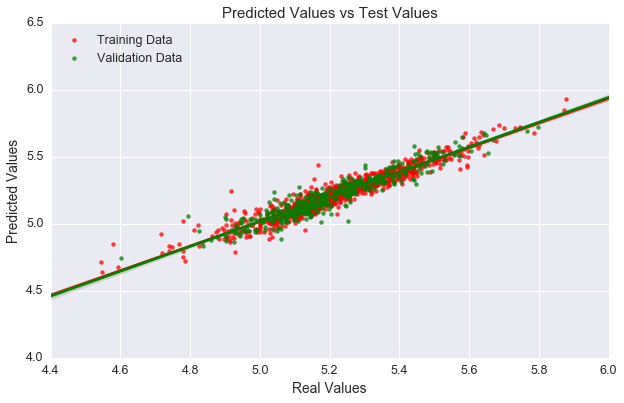

In [75]:
# Train the model again and compare accuracies
X = dummy_best_feature_train.drop(['SalePrice'], axis=1)
y = np.log10(train.SalePrice)
train_and_evaluate(X, y)

In [76]:
# Things to try:
# f_regression, mutual_info_regression


In [77]:
from sklearn.feature_selection import f_regression, mutual_info_regression

f_test, _ = f_regression(X, y)
print('f_test')
f_test /= np.max(f_test)
print(f_test)

mi = mutual_info_regression(X, y)
print('mi')
mi /= np.max(mi)
print(mi)

f_test
[5.16057967e-01 4.34027108e-01 3.95603680e-01 3.43404362e-01
 2.96870633e-01 2.68024323e-01 1.98824694e-01 2.65813677e-03
 1.00000000e+00 6.97969344e-04 2.29000329e-01 7.27117689e-03
 2.58514680e-03 4.73622659e-02 6.76802416e-02 7.84606351e-05
 1.65066623e-04 7.88819046e-03 1.56309847e-02 2.84438949e-03
 7.04009227e-03 3.77806347e-03 2.32693710e-02 3.10880349e-03
 2.70852514e-02 1.12469826e-02 8.88070565e-04 1.40599303e-02
 4.74926294e-04 1.86850996e-03 4.12428912e-02 6.74558319e-02
 2.80829802e-02 1.85749674e-03 7.55778519e-03 5.85413148e-04
 1.48512707e-02 1.76250223e-02 9.73475550e-03 2.42437090e-03
 7.84306979e-03 7.55016613e-03 1.36902717e-03 1.25007388e-03
 9.54714689e-04 1.40608207e-04 7.71599233e-05 2.56869438e-04
 1.59696096e-03 1.87661741e-03 9.47814180e-04 2.25229561e-05
 3.64375351e-05 8.20394247e-05 1.47381171e-03 5.56794260e-03
 2.92534870e-03 4.97520401e-04 3.10620022e-04 3.70195472e-02
 4.57034270e-03 6.69990002e-05 2.70121031e-02 8.60113776e-02
 5.40459312e-02 1

In [78]:
for i in range(len(f_test)):
    if(mi[i]/f_test[i] > 100.0):
        print(i, f_test[i], mi[i])

7 0.0026581367743679887 0.4803542467313499
9 0.0006979693444785529 0.19830132137652837
61 6.699900018952652e-05 0.013922725502908843


In [79]:
all_cols = list(X.columns)
z = [all_cols[i] for i in [7, 9, 61]]
z

['MSSubClass', 'OverallCond', 'HouseStyle_SLvl']

In [80]:
# Things to try:

# Check if a polynomial would fit the selected features better
# Is the problem actually a linear regression

In [81]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import math

In [82]:
def train_test_rmse(my_model, X_train, y_train, X_test, y_test):
    y_train_pred = my_model.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = math.sqrt(train_mse)
    print('RMSE for train: {}'.format(train_rmse))

    y_pred_test = my_model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_pred_test)
    test_rmse = math.sqrt(test_mse)

    print('RMSE for test: {}'.format(test_rmse))
    
    print('Accuracies: Train: {}'.format(my_model.score(X_train, y_train)))
    print('Accuracies: Test: {}'.format(my_model.score(X_test, y_test)))
    
    
    return train_rmse, test_rmse

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [84]:
d = 1
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=d)),
    ('model', LinearRegression())
]

pipeline = Pipeline(steps)

pipeline.fit(X_train, y_train)
print('degree: {}'.format(d))
train_test_rmse(pipeline, X_train, y_train, X_test, y_test)
print('\n\n\n')

degree: 1
RMSE for train: 0.04974088209192695
RMSE for test: 0.05473181525536366
Accuracies: Train: 0.9182824483566359
Accuracies: Test: 0.8972798819219202






/Users/ankitmodi/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/ankitmodi/anaconda3/lib/python3.5/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/ankitmodi/anaconda3/lib/python3.5/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/ankitmodi/anaconda3/lib/python3.5/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/ankitmodi/anaconda3/lib/python3.5/site-packages/sklearn/pipeline.py:511: DataConversio

In [ ]:
# Things to try:

# Try regularization : Lasso

In [86]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet


In [90]:
a = 0.010
while(a<1.0):
    steps = [
        ('scalar', StandardScaler()),
        ('poly', PolynomialFeatures(degree=1)),
        ('model', Ridge(alpha=a, fit_intercept=True))
    ]

    ridge_pipe = Pipeline(steps)
    ridge_pipe.fit(X_train, y_train)
    print(a)
    train_test_rmse(ridge_pipe, X_train, y_train, X_test, y_test)
    print('\n\n')
    a += 0.10


/Users/ankitmodi/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/ankitmodi/anaconda3/lib/python3.5/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/ankitmodi/anaconda3/lib/python3.5/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/ankitmodi/anaconda3/lib/python3.5/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/ankitmodi/anaconda3/lib/python3.5/site-packages/sklearn/pipeline.py:511: DataConversio

0.01
RMSE for train: 0.049740882841445413
RMSE for test: 0.05473173190688487
Accuracies: Train: 0.9182824458939207
Accuracies: Test: 0.8972801947768484



0.11
RMSE for train: 0.04974097154021165
RMSE for test: 0.054730964785739994
Accuracies: Train: 0.9182821544534686
Accuracies: Test: 0.8972830742027177



0.21000000000000002
RMSE for train: 0.0497412036696244
RMSE for test: 0.05473031439032956
Accuracies: Train: 0.9182813917357664
Accuracies: Test: 0.8972855154613516



0.31000000000000005
RMSE for train: 0.04974157342386748
RMSE for test: 0.0547297753243699
Accuracies: Train: 0.918280176810826
Accuracies: Test: 0.8972875388229973



0.41000000000000003
RMSE for train: 0.049742075258134295
RMSE for test: 0.054729342468487735
Accuracies: Train: 0.9182785278877381
Accuracies: Test: 0.897289163515111



0.51
RMSE for train: 0.04974270387468816
RMSE for test: 0.0547290109637001
Accuracies: Train: 0.9182764623609375
Accuracies: Test: 0.8972904077847982



0.61
RMSE for train: 0.049743454

/Users/ankitmodi/anaconda3/lib/python3.5/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/ankitmodi/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/ankitmodi/anaconda3/lib/python3.5/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/ankitmodi/anaconda3/lib/python3.5/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/ankitmodi/anaconda3/lib/python3.5/site-packages/sklearn/pipeline.py:331: DataConversio

In [ ]:
# Things to try:

# Try regularization : Lasso

In [94]:
alp = 0.0
while(alp < 0.010):
    steps = [
        ('scalar', StandardScaler()),
        ('poly', PolynomialFeatures(degree=1)),
        ('model', Lasso(alpha=alp, fit_intercept=True))
    ]

    lasso_pipe = Pipeline(steps)
    print(alp)
    lasso_pipe.fit(X_train, y_train)
    train_test_rmse(lasso_pipe, X_train, y_train, X_test, y_test)
    print('\n\n')
    alp += 0.001


0.0
RMSE for train: 0.04974088209192695
RMSE for test: 0.0547318152474205
Accuracies: Train: 0.9182824483566359
Accuracies: Test: 0.8972798819517356



0.001
RMSE for train: 0.052368903773641805
RMSE for test: 0.055702125210355884
Accuracies: Train: 0.9094193679314964
Accuracies: Test: 0.8936054613733833



0.002
RMSE for train: 0.05421616454327271
RMSE for test: 0.05654847511566165
Accuracies: Train: 0.902916379881659
Accuracies: Test: 0.8903477363219127



0.003
RMSE for train: 0.05556363664474687
RMSE for test: 0.05711121845713685
Accuracies: Train: 0.8980306370563684


/Users/ankitmodi/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/ankitmodi/anaconda3/lib/python3.5/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/ankitmodi/anaconda3/lib/python3.5/site-packages/sklearn/pipeline.py:267: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params)
/Users/ankitmodi/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/ankitmodi/anaconda3/lib/python3.5/site-packages/sklearn/

Accuracies: Test: 0.8881544635300458



0.004
RMSE for train: 0.056850996061187216
RMSE for test: 0.057841914307797435
Accuracies: Train: 0.8932508225749828
Accuracies: Test: 0.8852741931530227



0.005
RMSE for train: 0.058270457446929144
RMSE for test: 0.05855014930693431
Accuracies: Train: 0.8878536261023973
Accuracies: Test: 0.8824475137254262



0.006
RMSE for train: 0.059630589073370044
RMSE for test: 0.05930257440801159
Accuracies: Train: 0.8825571504522459
Accuracies: Test: 0.8794067778045033



0.007
RMSE for train: 0.06083101939493289
RMSE for test: 0.06001654794552801
Accuracies: Train: 0.877781044029317
Accuracies: Test: 0.8764855328786243



0.008
RMSE for train: 0.062069680536927754
RMSE for test: 0.060740096891398705
Accuracies: Train: 0.8727530442420008
Accuracies: Test: 0.8734894435464657



0.009000000000000001
RMSE for train: 0.06334692872675467
RMSE for test: 0.06148624698288931
Accuracies: Train: 0.867462276075833
Accuracies: Test: 0.8703621631472518





/Users/ankitmodi/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/ankitmodi/anaconda3/lib/python3.5/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/ankitmodi/anaconda3/lib/python3.5/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/ankitmodi/anaconda3/lib/python3.5/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/ankitmodi/anaconda3/lib/python3.5/site-packages/sklearn/pipeline.py:511: DataConversio

In [ ]:
# Things to try:

# # Try regularization : ElasticNet

In [96]:
alpha = 0.0
while (alpha < 1.0):
    steps = [
        ('scalar', StandardScaler()),
        ('poly', PolynomialFeatures(degree=1)),
        ('model', ElasticNet(alpha=alpha, fit_intercept=True))
    ]
    elastic_pipe = Pipeline(steps)
    elastic_pipe.fit(X_train, y_train)
    print(alpha)
    train_test_rmse(elastic_pipe, X_train, y_train, X_test, y_test)
    print('\n\n')
    alpha += 0.1


/Users/ankitmodi/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/ankitmodi/anaconda3/lib/python3.5/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/ankitmodi/anaconda3/lib/python3.5/site-packages/sklearn/pipeline.py:267: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params)
/Users/ankitmodi/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/ankitmodi/anaconda3/lib/python3.5/site-packages/sklearn/

0.0
RMSE for train: 0.04974088209192695
RMSE for test: 0.0547318152474205
Accuracies: Train: 0.9182824483566359
Accuracies: Test: 0.8972798819517356



0.1
RMSE for train: 0.09905387656080714
RMSE for test: 0.09445512681600904
Accuracies: Train: 0.6759355926264687
Accuracies: Test: 0.694066612072297



0.2
RMSE for train: 0.1439958416171324
RMSE for test: 0.14063562191928544
Accuracies: Train: 0.31516131947591086
Accuracies: Test: 0.32178642017690884



0.30000000000000004
RMSE for train: 0.17400262880411613
RMSE for test: 0.17152769763303358
Accuracies: Train: 0.0
Accuracies: Test: -0.008891171656766783



0.4
RMSE for train: 0.17400262880411613
RMSE for test: 0.17152769763303358
Accuracies: Train: 0.0
Accuracies: Test: -0.008891171656766783



0.5
RMSE for train: 0.17400262880411613
RMSE for test: 0.17152769763303358
Accuracies: Train: 0.0
Accuracies: Test: -0.008891171656766783



0.6
RMSE for train: 0.17400262880411613
RMSE for test: 0.17152769763303358
Accuracies: Train: 0.0
Accur

/Users/ankitmodi/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/ankitmodi/anaconda3/lib/python3.5/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/ankitmodi/anaconda3/lib/python3.5/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/ankitmodi/anaconda3/lib/python3.5/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/ankitmodi/anaconda3/lib/python3.5/site-packages/sklearn/pipeline.py:511: DataConversio